In [6]:
import numpy as np
from gym import spaces
import matplotlib.pyplot as plt
from scipy import stats
import random
from recsim import document
from recsim import user
from recsim.choice_model import MultinomialLogitChoiceModel
from recsim.simulator import environment
from recsim.simulator import recsim_gym

In [7]:
from typing import Tuple
from pathlib import Path
DATASET_NAME="Spotify"
_DATA_PATH = Path(Path.home() / os.environ.get("DATA_PATH"))
_DATASET_PATH = _DATA_PATH / DATASET_NAME

In [8]:
import pandas as pd
songs=pd.read_feather(_DATASET_PATH)

In [9]:
songs

,year,name,artists,popularity,valence,song_id,danceability,loudness,speechiness,acousticness,liveness,label,key,mode,tempo,instrumentalness,energy,duration_ms
0,1921,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",4,0.0594,4BJqT0PrAfrxzMOxytFOIz,0.279,0.624916,0.0366,0.98200,0.6650,2,10,1,80.954,0.878000,0.211,831667
1,1921,Clancy Lowered the Boom,['Dennis Day'],5,0.9630,7xPhfUan2yNtyFG0cUWkt8,0.819,0.744797,0.4150,0.73200,0.1600,1,7,1,60.936,0.000000,0.341,180533
2,1921,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,5,0.0394,1o6I8BglA6ylDMrIELygv1,0.328,0.707071,0.0339,0.96100,0.1010,2,3,1,110.339,0.913000,0.166,500062
3,1921,Danny Boy,['Frank Parker'],3,0.1650,3ftBPsC5vPBKxYSee08FDH,0.275,0.793736,0.0354,0.96700,0.3810,1,5,1,100.109,0.000028,0.309,210000
4,1921,When Irish Eyes Are Smiling,['Phil Regan'],2,0.2530,4d6HGyGT8e121BsdKmw9v6,0.418,0.781521,0.0380,0.95700,0.2290,1,3,1,101.665,0.000002,0.193,166693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",72,0.6080,0KkIkfsLEJbrcIhYsCL7L5,0.786,0.881654,0.0881,0.08460,0.0822,3,7,1,105.029,0.000289,0.808,301714
170649,2020,Halloweenie III: Seven Days,['Ashnikko'],68,0.7340,0OStKKAuXlxA0fMH54Qs6E,0.717,0.845353,0.0605,0.20600,0.1010,3,7,1,137.936,0.000000,0.753,150654
170650,2020,AYA,['MAMAMOO'],76,0.6370,4BZXVFYCb76Q0Klojq4piV,0.634,0.904769,0.0809,0.10100,0.2580,3,4,0,91.688,0.000009,0.858,211280
170651,2020,Darkness,['Eminem'],70,0.1950,5SiZJoLXp3WOl3J4C8IK0d,0.671,0.827484,0.3080,0.00998,0.6430,3,2,1,75.055,0.000008,0.623,337147


array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'label'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'tempo'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>, <AxesSubplot: >]],
      dtype=object)

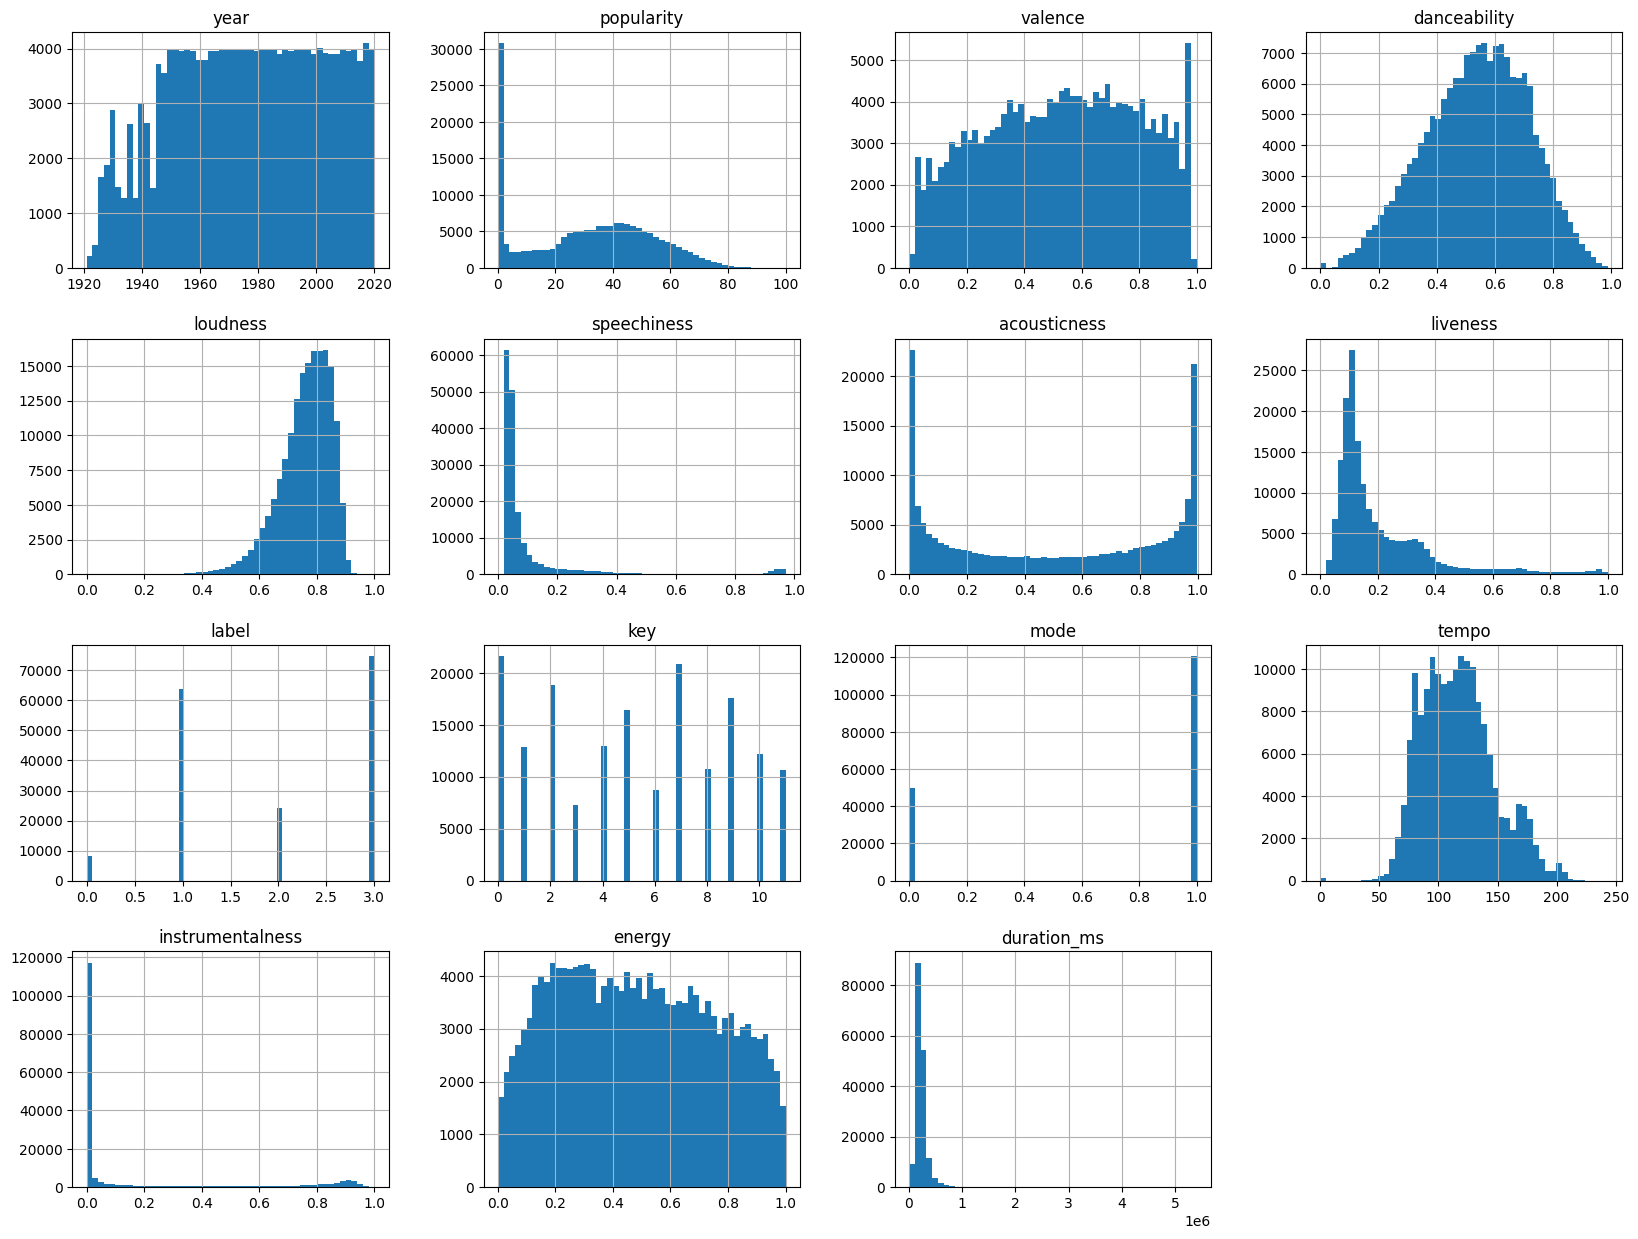

In [10]:
songs.hist(bins=50,figsize=(20,15))

Danceability

Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]WARNING:fitter.fitter:SKIPPED _fit distribution (taking more than 30 seconds)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
Fitting 109 distributions:   2%|▏         | 2/109 [00:00<00:45,  2.35it/s]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [02:15<00:00,  1.25s/it]


{'norm': {'loc': 0.5373955347986852, 'scale': 0.17613721955546152}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


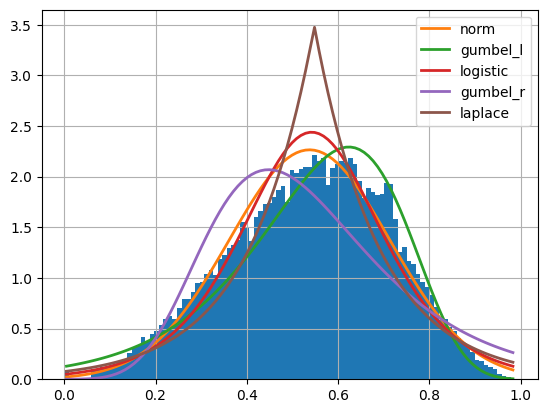

In [6]:
from fitter import Fitter, get_common_distributions, get_distributions
danceability=songs["danceability"].values
f = Fitter(danceability)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Speechiness

Fitting 109 distributions:   1%|          | 1/109 [00:03<05:39,  3.14s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [01:18<00:00,  1.39it/s]


{'laplace': {'loc': 0.045, 'scale': 0.06335336735949558}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


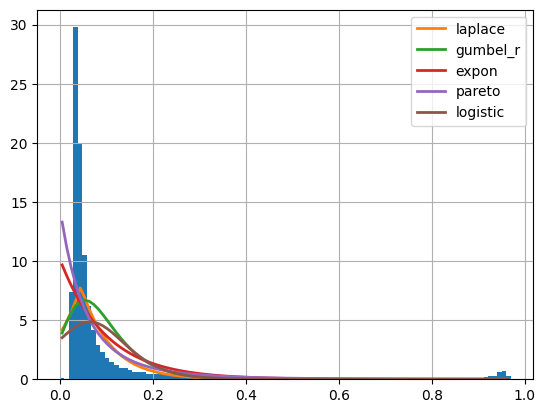

In [7]:
from fitter import Fitter, get_common_distributions, get_distributions
speechiness=songs["speechiness"].values
f = Fitter(speechiness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Acousticness

Fitting 109 distributions:   1%|          | 1/109 [00:06<11:01,  6.13s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [02:01<00:00,  1.11s/it]


{'uniform': {'loc': 0.0, 'scale': 0.996}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


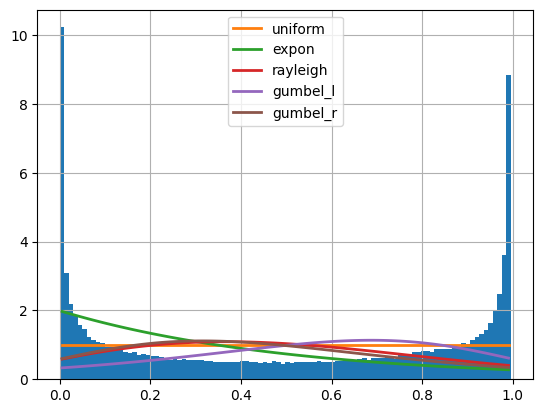

In [8]:
from fitter import Fitter, get_common_distributions, get_distributions
acousticness=songs["acousticness"].values
f = Fitter(acousticness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   1%|          | 1/109 [00:08<15:56,  8.85s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [03:09<00:00,  1.74s/it]


{'uniform': {'loc': 0.0, 'scale': 1.0}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


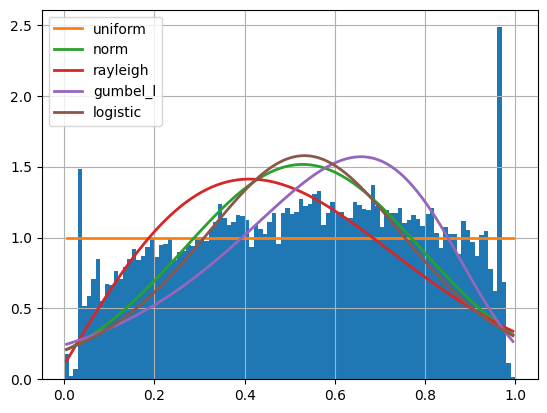

In [9]:
from fitter import Fitter, get_common_distributions, get_distributions
valence=songs["valence"].values
f = Fitter(valence)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   1%|          | 1/109 [00:11<21:03, 11.70s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [02:15<00:00,  1.24s/it]


{'laplace': {'loc': 0.136, 'scale': 0.11092283130094402}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


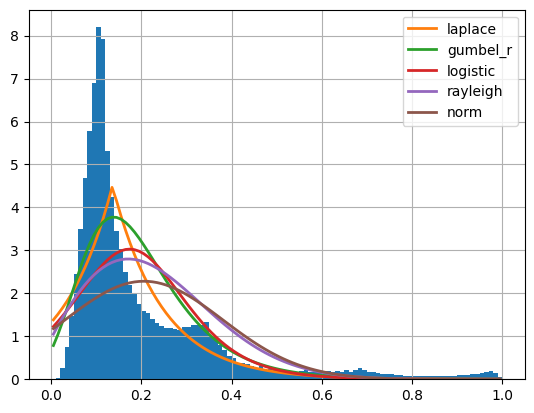

In [10]:
from fitter import Fitter, get_common_distributions, get_distributions
liveness=songs["liveness"].values
f = Fitter(liveness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

In [11]:
from fitter import Fitter, get_common_distributions, get_distributions
loudness=songs["loudness"].values
f = Fitter(loudness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   1%|          | 1/109 [00:11<21:22, 11.87s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [04:28<00:00,  2.46s/it]


{'gumbel_l': {'loc': 0.8004193058243345, 'scale': 0.0690033070151354}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Error in callback <function _draw_all_if_interactive at 0x7f34dfe66c10> (for post_execute):


Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]WARNING:fitter.fitter:SKIPPED _fit distribution (taking more than 30 seconds)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
Fitting 109 distributions:   2%|▏         | 2/109 [00:00<00:42,  2.52it/s]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [01:18<00:00,  1.39it/s]


{'expon': {'loc': 0.0, 'scale': 0.16700958082940237}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


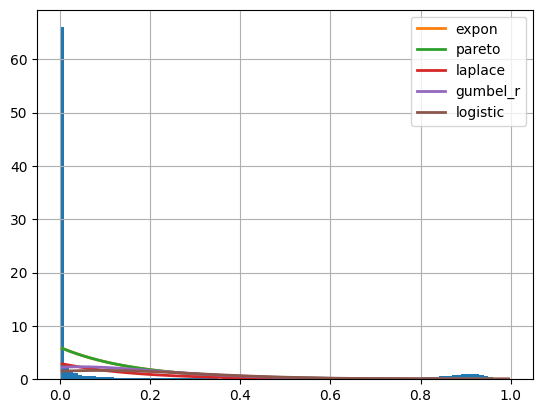

In [5]:
from fitter import Fitter, get_common_distributions, get_distributions
loudness=songs["instrumentalness"].values
f = Fitter(loudness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

In [6]:
from fitter import Fitter, get_common_distributions, get_distributions
loudness=songs["energy"].values
f = Fitter(loudness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   1%|          | 1/109 [00:02<04:35,  2.55s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [02:05<00:00,  1.15s/it]


{'uniform': {'loc': 0.0, 'scale': 1.0}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Error in callback <function flush_figures at 0x7f677b94ac10> (for post_execute):


Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]WARNING:fitter.fitter:SKIPPED _fit distribution (taking more than 30 seconds)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [01:04<00:00,  1.70it/s]


{'gumbel_r': {'loc': 102.26991914996023, 'scale': 27.79478925686645}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


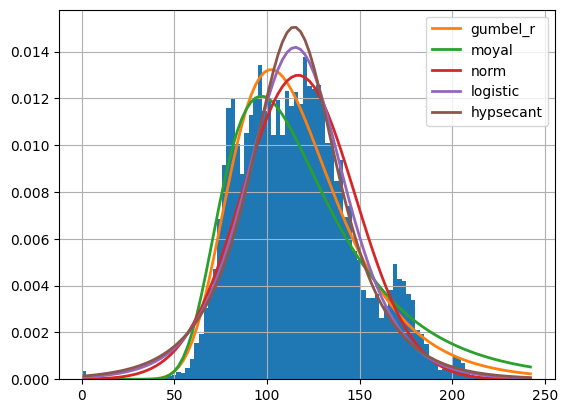

In [11]:
from fitter import Fitter, get_common_distributions, get_distributions
loudness=songs["tempo"].values
f = Fitter(loudness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   1%|          | 1/109 [00:03<05:33,  3.09s/it]/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/fitter/fitter.py:467: DeprecationWarning:         `gilbrat.fit` is deprecated, use `gibrat.fit` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  self.result = func(args, **kwargs)
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2776: DeprecationWarning:         `gilbrat.stats` is deprecated, use `gibrat.stats` instead!
        `gilbrat` is a misspelling of the correct name for the `gibrat` distribution, and will be removed in SciPy 1.11.
  mu, mu2 = self.stats(*args, **{'moments': 'mv'})
Fitting 109 distributions: 100%|██████████| 109/109 [01:15<00:00,  1.44it/s]


{'laplace': {'loc': 207467.0, 'scale': 69419.7225773939}}

/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/aayush/git/rl_recsys/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


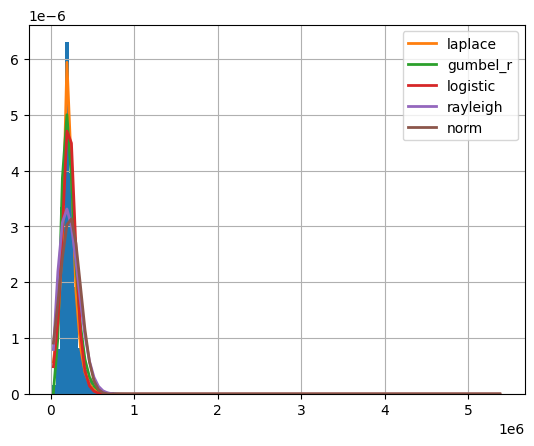

In [12]:
from fitter import Fitter, get_common_distributions, get_distributions
loudness=songs["duration_ms"].values
f = Fitter(loudness)
f.fit(progress=False)
f.summary()
f.get_best(method = 'sumsquare_error')